In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [16]:
df = pd.read_csv('daily_weather_2020.csv', encoding= 'unicode_escape')

In [34]:
print(df.shape)

(30688, 46)


In [17]:
print(df.head())

   Unnamed: 0 Country/Region Province/State        time  \
0           0    Afghanistan            NaN  2019-12-31   
1           1    Afghanistan            NaN  2020-01-01   
2           2    Afghanistan            NaN  2020-01-02   
3           3    Afghanistan            NaN  2020-01-03   
4           4    Afghanistan            NaN  2020-01-04   

                                             summary               icon  \
0  Rain (with a chance of 1â3 in. of snow) unti...               rain   
1                     Light rain throughout the day.               rain   
2                          Clear throughout the day.               rain   
3                  Partly cloudy throughout the day.  partly-cloudy-day   
4                     Light rain throughout the day.               rain   

    sunriseTime    sunsetTime  moonPhase  precipIntensity  ...  \
0  1.577847e+09  1.577883e+09       0.20           0.0156  ...   
1  1.577933e+09  1.577969e+09       0.23           0.0235  ...

In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30688 entries, 0 to 30687
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   30688 non-null  int64  
 1   Country/Region               30688 non-null  object 
 2   Province/State               13776 non-null  object 
 3   time                         30688 non-null  object 
 4   summary                      30685 non-null  object 
 5   icon                         30688 non-null  object 
 6   sunriseTime                  30663 non-null  float64
 7   sunsetTime                   30663 non-null  float64
 8   moonPhase                    30688 non-null  float64
 9   precipIntensity              30688 non-null  float64
 10  precipIntensityMax           30688 non-null  float64
 11  precipIntensityMaxTime       30584 non-null  float64
 12  precipProbability            30688 non-null  float64
 13  precipType      

In [19]:
print(df.describe())

         Unnamed: 0   sunriseTime    sunsetTime     moonPhase  \
count  30688.000000  3.066300e+04  3.066300e+04  30688.000000   
mean   15343.500000  1.582624e+09  1.582666e+09      0.510009   
std     8859.006867  2.790765e+06  2.793909e+06      0.287635   
min        0.000000  1.577782e+09  1.577821e+09      0.000000   
25%     7671.750000  1.580208e+09  1.580249e+09      0.260000   
50%    15343.500000  1.582626e+09  1.582669e+09      0.510000   
75%    23015.250000  1.585043e+09  1.585087e+09      0.770000   
max    30687.000000  1.587452e+09  1.587504e+09      1.000000   

       precipIntensity  precipIntensityMax  precipIntensityMaxTime  \
count     30688.000000        30688.000000            3.058400e+04   
mean          0.004782            0.020025            1.582650e+09   
std           0.010669            0.046630            2.789079e+06   
min           0.000000            0.000000            1.577761e+09   
25%           0.000100            0.000400            1.580245e+

In [20]:
df.columns

Index(['Unnamed: 0', 'Country/Region', 'Province/State', 'time', 'summary',
       'icon', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensity',
       'precipIntensityMax', 'precipIntensityMaxTime', 'precipProbability',
       'precipType', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'humidity', 'pressure',
       'windSpeed', 'windGust', 'windGustTime', 'windBearing', 'cloudCover',
       'uvIndex', 'uvIndexTime', 'visibility', 'ozone', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'Lat', 'Long',
       'precipAccumulation'],
      dtype='object')

In [35]:
df.groupby('month')['temperaturehigh'].mean()

month
1     59.292556
2     61.790410
3     66.313713
4     70.122244
12    58.584202
Name: temperaturehigh, dtype: float64

In [24]:
df['month'] = df['time'].dt.month

In [26]:
df.columns = df.columns.str.strip().str.lower()

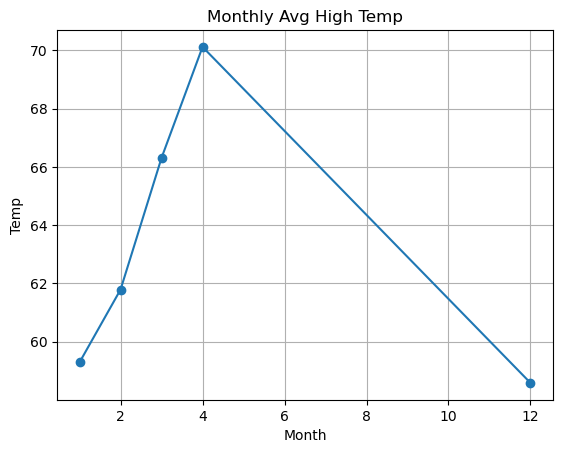

In [27]:
df.groupby('month')['temperaturehigh'].mean().plot(marker='o')
plt.title("Monthly Avg High Temp")
plt.xlabel("Month")
plt.ylabel("Temp")
plt.grid(True)
plt.show()

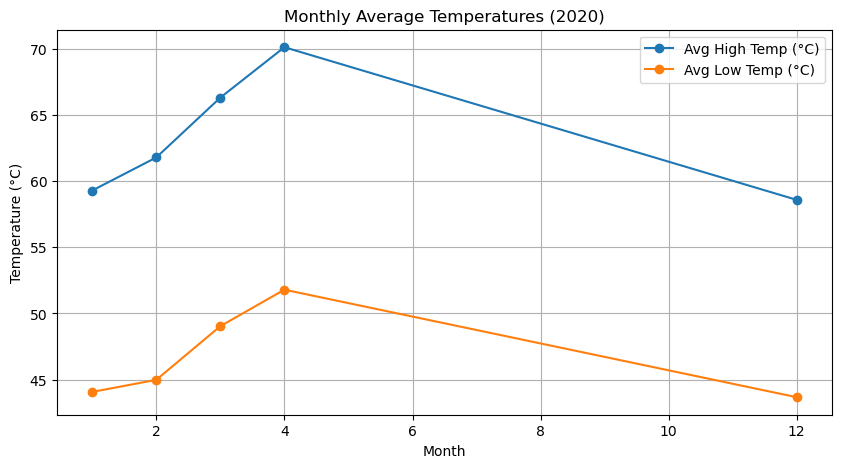

In [28]:
# ========== 1. Monthly Avg High and Low Temperatures ==========
monthly_high = df.groupby('month')['temperaturehigh'].mean()
monthly_low = df.groupby('month')['temperaturelow'].mean()

plt.figure(figsize=(10, 5))
plt.plot(monthly_high.index, monthly_high.values, marker='o', label='Avg High Temp (°C)')
plt.plot(monthly_low.index, monthly_low.values, marker='o', label='Avg Low Temp (°C)')
plt.title('Monthly Average Temperatures (2020)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

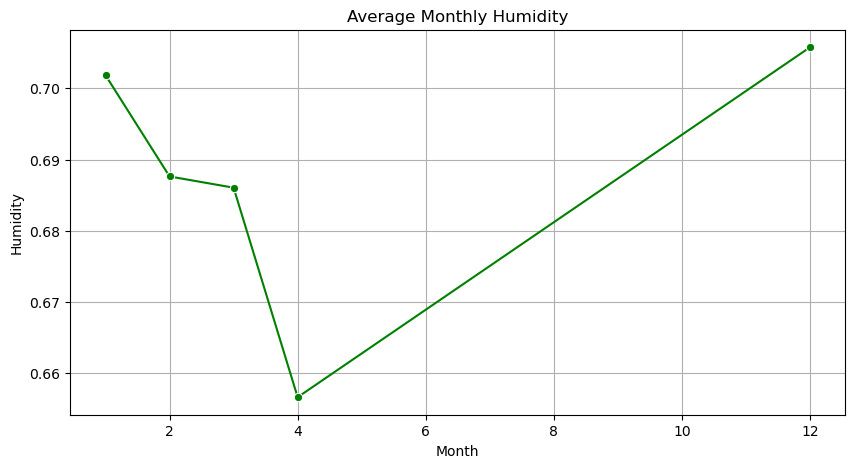

In [30]:
# ========== 3. Monthly Average Humidity ==========
monthly_humidity = df.groupby('month')['humidity'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_humidity.index, y=monthly_humidity.values, marker='o', color='green')
plt.title("Average Monthly Humidity")
plt.xlabel("Month")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

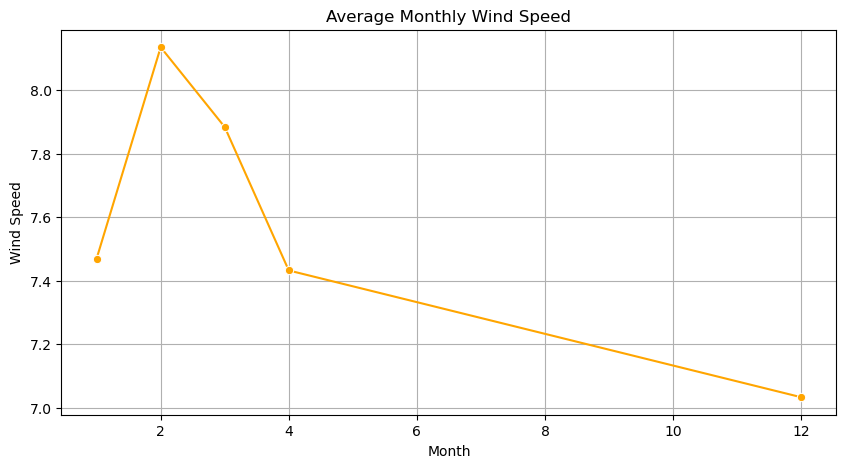

In [31]:
# ========== 4. Monthly Wind Speed ==========
monthly_wind = df.groupby('month')['windspeed'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_wind.index, y=monthly_wind.values, marker='o', color='orange')
plt.title("Average Monthly Wind Speed")
plt.xlabel("Month")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.show()

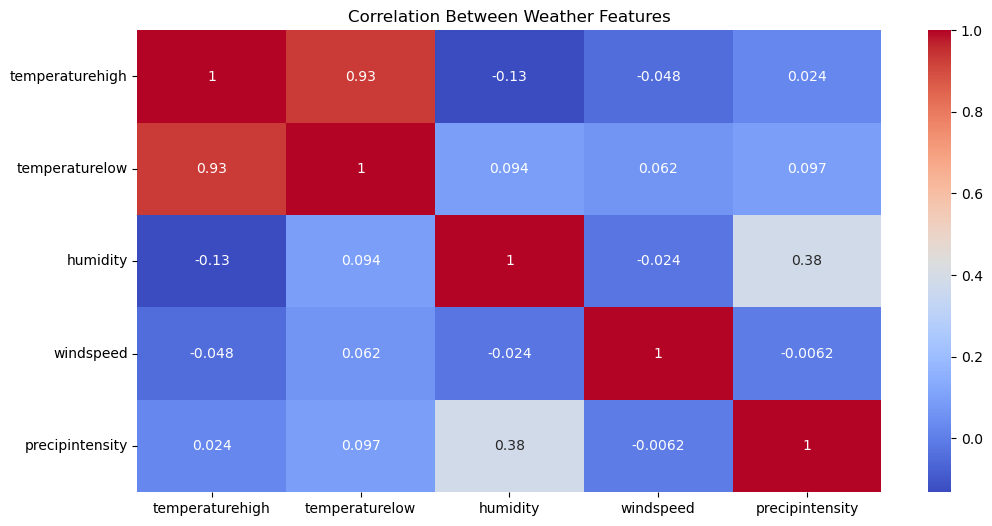

In [32]:
# ========== 5. Correlation Heatmap ==========
plt.figure(figsize=(12, 6))
corr_features = ['temperaturehigh', 'temperaturelow', 'humidity', 'windspeed', 'precipintensity']
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Weather Features")
plt.show()